In [2]:
import pandas as pd
import os

# --- Define the production Excel file name and sheet name ---
production_excel_file_name = 'WCRFPUS2w.xls' # The original .xls file name
production_data_sheet_name = 'Data 1' # The name of the sheet containing the data
production_header_row_index = 1 # Header is likely on the 2nd row (index 1)

# --- Read the specific sheet from the Production Excel file into a pandas DataFrame ---
try:
    # Read the specified sheet, using the correct header row
    df_production = pd.read_excel(production_excel_file_name, sheet_name=production_data_sheet_name, header=production_header_row_index)

    print(f"Successfully loaded production data from sheet '{production_data_sheet_name}' in '{production_excel_file_name}'.")
    print(f"Using row {production_header_row_index + 1} as the header.")

    # --- Inspect the loaded production DataFrame ---
    print("\nProduction DataFrame head:")
    print(df_production.head())

    print("\nProduction DataFrame info:")
    df_production.info()

    print("\nProduction DataFrame columns:", df_production.columns.tolist())
    print("\nProduction DataFrame shape:", df_production.shape)


except FileNotFoundError:
    print(f"Error: The file '{production_excel_file_name}' was not found.")
    print("Please make sure the original 'WCRFPUS2w.xls' file is uploaded to Colab.")
except Exception as e:
    print(f"An error occurred while reading the Production Excel file or sheet: {e}")
    print(f"Please double-check the filename ('{production_excel_file_name}') and sheet name ('{production_data_sheet_name}').")

# The DataFrame 'df_production' should now be loaded correctly (if no errors)
# and ready for inspection.

Successfully loaded production data from sheet 'Data 1' in 'WCRFPUS2w.xls'.
Using row 2 as the header.

Production DataFrame head:
             Sourcekey                                           WCRFPUS2
0                 Date  Weekly U.S. Field Production of Crude Oil  (Th...
1  1983-01-07 00:00:00                                               8634
2  1983-01-14 00:00:00                                               8634
3  1983-01-21 00:00:00                                               8634
4  1983-01-28 00:00:00                                               8634

Production DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sourcekey  2208 non-null   object
 1   WCRFPUS2   2208 non-null   object
dtypes: object(2)
memory usage: 34.6+ KB

Production DataFrame columns: ['Sourcekey', 'WCRFPUS2']

Production DataFrame shape: (2208, 2

In [3]:
import pandas as pd

# Assume df_production is available from the previous step

# --- Data Cleaning and Preparation for Production Data ---

print("\nCleaning production data...")

# 1. Remove the first row (index 0) containing series descriptions
df_production_cleaned = df_production.iloc[1:].copy()

# 2. Rename columns for clarity
date_col_original_prod = 'Sourcekey'
production_col_original = 'WCRFPUS2'

date_col_new = 'Week' # Use the same name as in product supplied data for easy merging
production_col_new = 'Weekly US Crude Oil Production (Thousand Barrels)' # Descriptive name

df_production_cleaned = df_production_cleaned.rename(columns={
    date_col_original_prod: date_col_new,
    production_col_original: production_col_new
})

# 3. Convert data types
df_production_cleaned[date_col_new] = pd.to_datetime(df_production_cleaned[date_col_new])
df_production_cleaned[production_col_new] = pd.to_numeric(df_production_cleaned[production_col_new], errors='coerce')

# 4. Filter by date (since 2020-01-01) - Use the same start date as for product supplied
start_date_filter = '2020-01-01'
df_production_filtered = df_production_cleaned[df_production_cleaned[date_col_new] >= start_date_filter].copy()

# 5. Sort by date
df_production_filtered = df_production_filtered.sort_values(by=date_col_new).reset_index(drop=True)


print(f"Production data cleaning and preparation complete. Filtered data since {start_date_filter}.")
print("Cleaned and filtered Production DataFrame head:")
print(df_production_filtered.head())

print("\nCleaned and filtered Production DataFrame info:")
df_production_filtered.info()

print("\nCleaned and filtered Production DataFrame shape:", df_production_filtered.shape)

# The DataFrame df_production_filtered is now ready to be combined with product supplied data.


Cleaning production data...
Production data cleaning and preparation complete. Filtered data since 2020-01-01.
Cleaned and filtered Production DataFrame head:
        Week  Weekly US Crude Oil Production (Thousand Barrels)
0 2020-01-03                                              12900
1 2020-01-10                                              13000
2 2020-01-17                                              13000
3 2020-01-24                                              13000
4 2020-01-31                                              12900

Cleaned and filtered Production DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 2 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Week                                               280 non-null    datetime64[ns]
 1   Weekly US Crude Oil Production (Thous

In [4]:
import pandas as pd
import os

# --- Define the product supplied Excel file name and sheet name ---
excel_file_name = 'PET_CONS_WPSUP_K_W.xls' # The original .xls file name
data_sheet_name = 'Data 1' # The name of the sheet containing the data
header_row_index = 1 # Header is on the 2nd row (index 1)

# --- Read the specific sheet from the Product Supplied Excel file into a pandas DataFrame ---
try:
    # Read the specified sheet, using the correct header row
    df = pd.read_excel(excel_file_name, sheet_name=data_sheet_name, header=header_row_index)

    print(f"Successfully loaded data from sheet '{data_sheet_name}' in '{excel_file_name}'.")
    print(f"Using row {header_row_index + 1} as the header.")

    # --- Data Cleaning and Preparation for Product Supplied Data ---
    print("\nCleaning product supplied data...")

    # 1. Remove the first row (index 0) containing series descriptions
    df_cleaned = df.iloc[1:].copy()

    # 2. Rename columns for clarity
    date_col_original = 'Sourcekey'
    total_supplied_col_original = 'WRPUPUS2'

    date_col_new = 'Week' # Use a consistent date column name
    total_supplied_col_new = 'Total US Product Supplied (Thousand Barrels)' # Descriptive name

    df_cleaned = df_cleaned.rename(columns={
        date_col_original: date_col_new,
        total_supplied_col_original: total_supplied_col_new
    })

    # 3. Convert data types
    df_cleaned[date_col_new] = pd.to_datetime(df_cleaned[date_col_new])
    df_cleaned[total_supplied_col_new] = pd.to_numeric(df_cleaned[total_supplied_col_new], errors='coerce')

    # 4. Select only the relevant columns for analysis
    df_analysis = df_cleaned[[date_col_new, total_supplied_col_new]].copy()

    # 5. Filter by date (since 2020-01-01)
    start_date_filter = '2020-01-01'
    df_analysis_filtered = df_analysis[df_analysis[date_col_new] >= start_date_filter].copy()

    # Sort by date to ensure chronological order
    df_analysis_filtered = df_analysis_filtered.sort_values(by=date_col_new).reset_index(drop=True)


    print(f"Product supplied data cleaning and preparation complete. Filtered data since {start_date_filter}.")
    print("Cleaned and filtered Product Supplied DataFrame head:")
    print(df_analysis_filtered.head())

    print("\nCleaned and filtered Product Supplied DataFrame info:")
    df_analysis_filtered.info()

    print("\nCleaned and filtered Product Supplied DataFrame shape:", df_analysis_filtered.shape)


except FileNotFoundError:
    print(f"Error: The file '{excel_file_name}' was not found.")
    print("Please make sure the original 'PET_CONS_WPSUP_K_W.xls' file is uploaded to Colab.")
except Exception as e:
    print(f"An error occurred during processing the Product Supplied data: {e}")


# The DataFrame 'df_analysis_filtered' should now be loaded and cleaned.

Successfully loaded data from sheet 'Data 1' in 'PET_CONS_WPSUP_K_W.xls'.
Using row 2 as the header.

Cleaning product supplied data...
Product supplied data cleaning and preparation complete. Filtered data since 2020-01-01.
Cleaned and filtered Product Supplied DataFrame head:
        Week  Total US Product Supplied (Thousand Barrels)
0 2020-01-03                                       19366.0
1 2020-01-10                                       19047.0
2 2020-01-17                                       21474.0
3 2020-01-24                                       19598.0
4 2020-01-31                                       20810.0

Cleaned and filtered Product Supplied DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Week                                   

In [5]:
import pandas as pd

# Assume df_analysis_filtered (Product Supplied) and df_production_filtered (Crude Oil Production) are available

# --- Combine the two DataFrames by merging on the 'Week' column ---
# Using an inner merge; since both DataFrames have the same dates since 2020-01-01,
# an inner merge will keep all rows from both.
df_combined = pd.merge(
    df_analysis_filtered,
    df_production_filtered,
    on='Week', # Merge key
    how='inner' # Keep only rows where Week exists in BOTH DataFrames
)

print("\nDataFrames successfully combined based on the 'Week' column.")

# --- Inspect the combined DataFrame ---
print("\nCombined DataFrame head:")
print(df_combined.head())

print("\nCombined DataFrame info:")
df_combined.info()

print("\nCombined DataFrame columns:", df_combined.columns.tolist())
print("\nCombined DataFrame shape:", df_combined.shape)

# The DataFrame 'df_combined' is now ready for comparative analysis (Production vs. Product Supplied).


DataFrames successfully combined based on the 'Week' column.

Combined DataFrame head:
        Week  Total US Product Supplied (Thousand Barrels)  \
0 2020-01-03                                       19366.0   
1 2020-01-10                                       19047.0   
2 2020-01-17                                       21474.0   
3 2020-01-24                                       19598.0   
4 2020-01-31                                       20810.0   

   Weekly US Crude Oil Production (Thousand Barrels)  
0                                              12900  
1                                              13000  
2                                              13000  
3                                              13000  
4                                              12900  

Combined DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column                                             Non-Null Count  Dtype  


Plotting Weekly US Crude Oil Production vs. Total Petroleum Product Supplied:


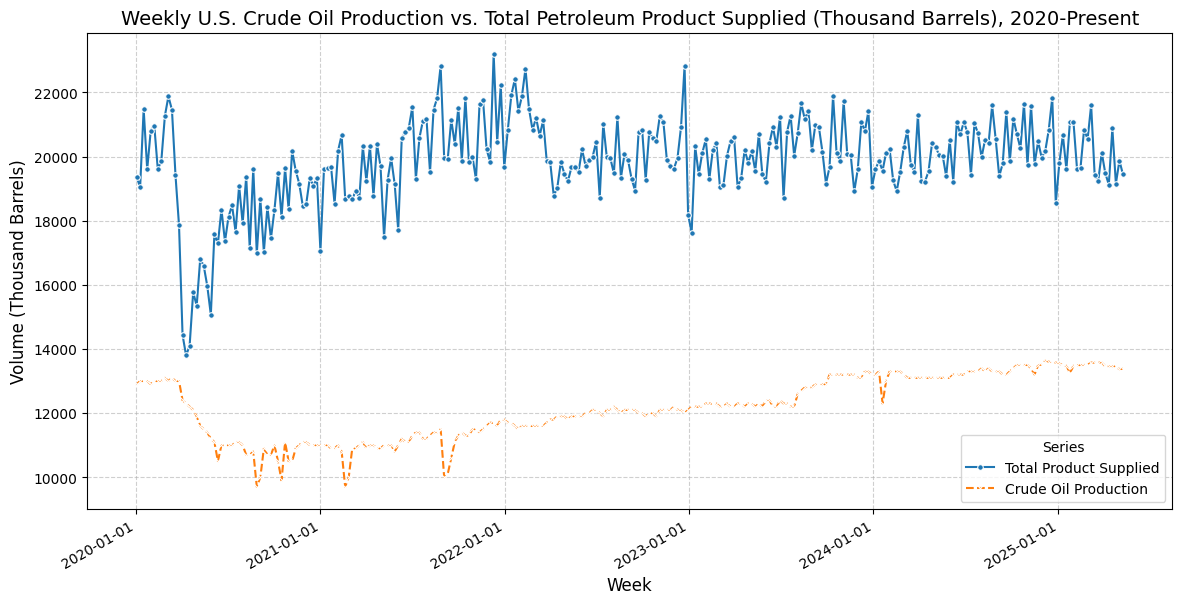

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df_combined is available

# --- Create a dual-line plot for Production vs. Product Supplied ---
print("\nPlotting Weekly US Crude Oil Production vs. Total Petroleum Product Supplied:")

plt.figure(figsize=(14, 7)) # Adjust figure size for better readability

# Plot Total US Product Supplied
sns.lineplot(data=df_combined, x='Week', y='Total US Product Supplied (Thousand Barrels)', label='Total Product Supplied', marker='o', linestyle='-', markersize=4)

# Plot Weekly US Crude Oil Production
sns.lineplot(data=df_combined, x='Week', y='Weekly US Crude Oil Production (Thousand Barrels)', label='Crude Oil Production', marker='x', linestyle='--', markersize=4)

# Add titles and labels
plt.title('Weekly U.S. Crude Oil Production vs. Total Petroleum Product Supplied (Thousand Barrels), 2020-Present', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Volume (Thousand Barrels)', fontsize=12)

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# Add a legend to distinguish the lines
plt.legend(title='Series', loc='best')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot (optional, update filename if saving)
# plt.savefig('plots/production_vs_supplied_plot.png')

# Show the plot
plt.show()


Calculated the difference between Total Product Supplied and Crude Oil Production.
Combined DataFrame head with difference column:
        Week  Total US Product Supplied (Thousand Barrels)  \
0 2020-01-03                                       19366.0   
1 2020-01-10                                       19047.0   
2 2020-01-17                                       21474.0   
3 2020-01-24                                       19598.0   
4 2020-01-31                                       20810.0   

   Weekly US Crude Oil Production (Thousand Barrels)  \
0                                              12900   
1                                              13000   
2                                              13000   
3                                              13000   
4                                              12900   

   Supply_vs_Production_Difference  
0                           6466.0  
1                           6047.0  
2                           8474.0  
3         

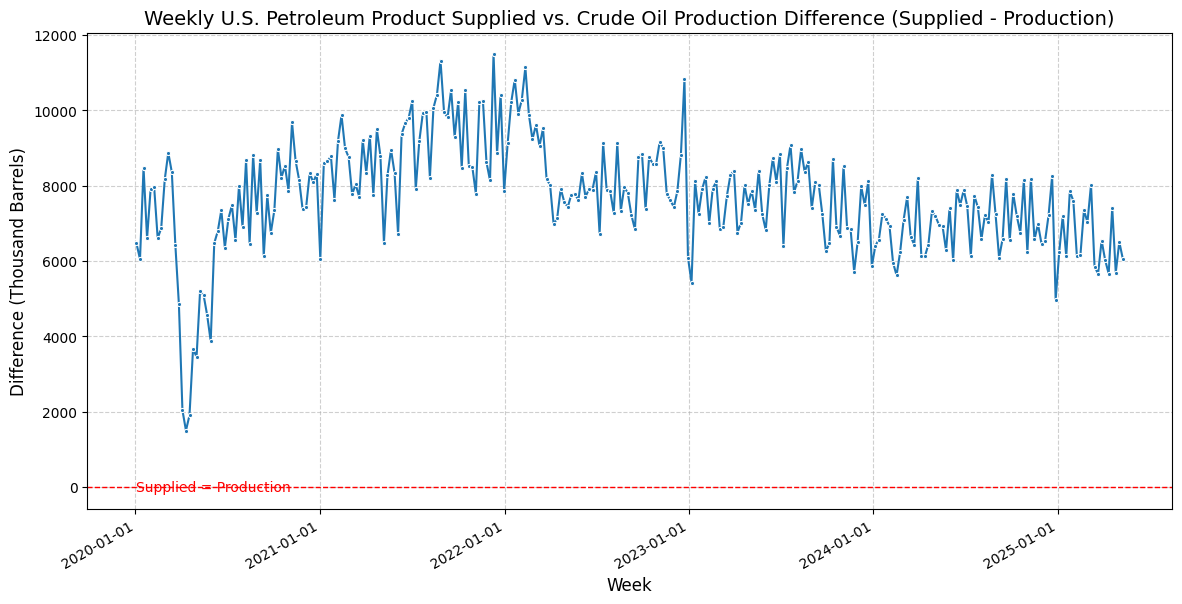

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df_combined is available

# --- Calculate the difference between Product Supplied and Production ---
# Let's calculate it as Supplied - Production
df_combined['Supply_vs_Production_Difference'] = df_combined['Total US Product Supplied (Thousand Barrels)'] - df_combined['Weekly US Crude Oil Production (Thousand Barrels)']

print("\nCalculated the difference between Total Product Supplied and Crude Oil Production.")
print("Combined DataFrame head with difference column:")
print(df_combined.head())


# --- Create a line plot of the difference ---
print("\nPlotting the difference between Supply and Production:")

plt.figure(figsize=(14, 7)) # Adjust figure size

# Plot the difference
sns.lineplot(data=df_combined, x='Week', y='Supply_vs_Production_Difference', marker='.', linestyle='-')

# Add a horizontal line at zero for reference
plt.axhline(0, color='red', linestyle='--', linewidth=1)


# Add titles and labels
plt.title('Weekly U.S. Petroleum Product Supplied vs. Crude Oil Production Difference (Supplied - Production)', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Difference (Thousand Barrels)', fontsize=12)
plt.text(df_combined['Week'].iloc[0], 0, 'Supplied = Production', va='center', ha='left', color='red')


# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# Add a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot (optional, update filename if saving)
# plt.savefig('plots/supply_production_difference_plot.png')

# Show the plot
plt.show()

In [9]:
import pandas as pd

# Assume df_analysis_filtered is available and cleaned

# --- Add Week of Year column ---
print("\nAdding 'Week_of_Year' column to df_analysis_filtered...")
# Use dt.isocalendar().week for ISO week number (1-52 or 53)
df_analysis_filtered['Week_of_Year'] = df_analysis_filtered['Week'].dt.isocalendar().week.astype(int)

print("Added 'Week_of_Year' column. Head of df_analysis_filtered:")
print(df_analysis_filtered.head())


Adding 'Week_of_Year' column to df_analysis_filtered...
Added 'Week_of_Year' column. Head of df_analysis_filtered:
        Week  Total US Product Supplied (Thousand Barrels)  Week_of_Year
0 2020-01-03                                       19366.0             1
1 2020-01-10                                       19047.0             2
2 2020-01-17                                       21474.0             3
3 2020-01-24                                       19598.0             4
4 2020-01-31                                       20810.0             5


In [10]:
import pandas as pd

# Assume df_analysis_filtered is available and includes 'Week_of_Year'

# --- Add Year column ---
print("\nAdding 'Year' column to df_analysis_filtered...")
df_analysis_filtered['Year'] = df_analysis_filtered['Week'].dt.year

print("Added 'Year' column. Head of df_analysis_filtered:")
print(df_analysis_filtered.head())


Adding 'Year' column to df_analysis_filtered...
Added 'Year' column. Head of df_analysis_filtered:
        Week  Total US Product Supplied (Thousand Barrels)  Week_of_Year  Year
0 2020-01-03                                       19366.0             1  2020
1 2020-01-10                                       19047.0             2  2020
2 2020-01-17                                       21474.0             3  2020
3 2020-01-24                                       19598.0             4  2020
4 2020-01-31                                       20810.0             5  2020



Creating Seasonal Subseries Plot for Total Product Supplied:


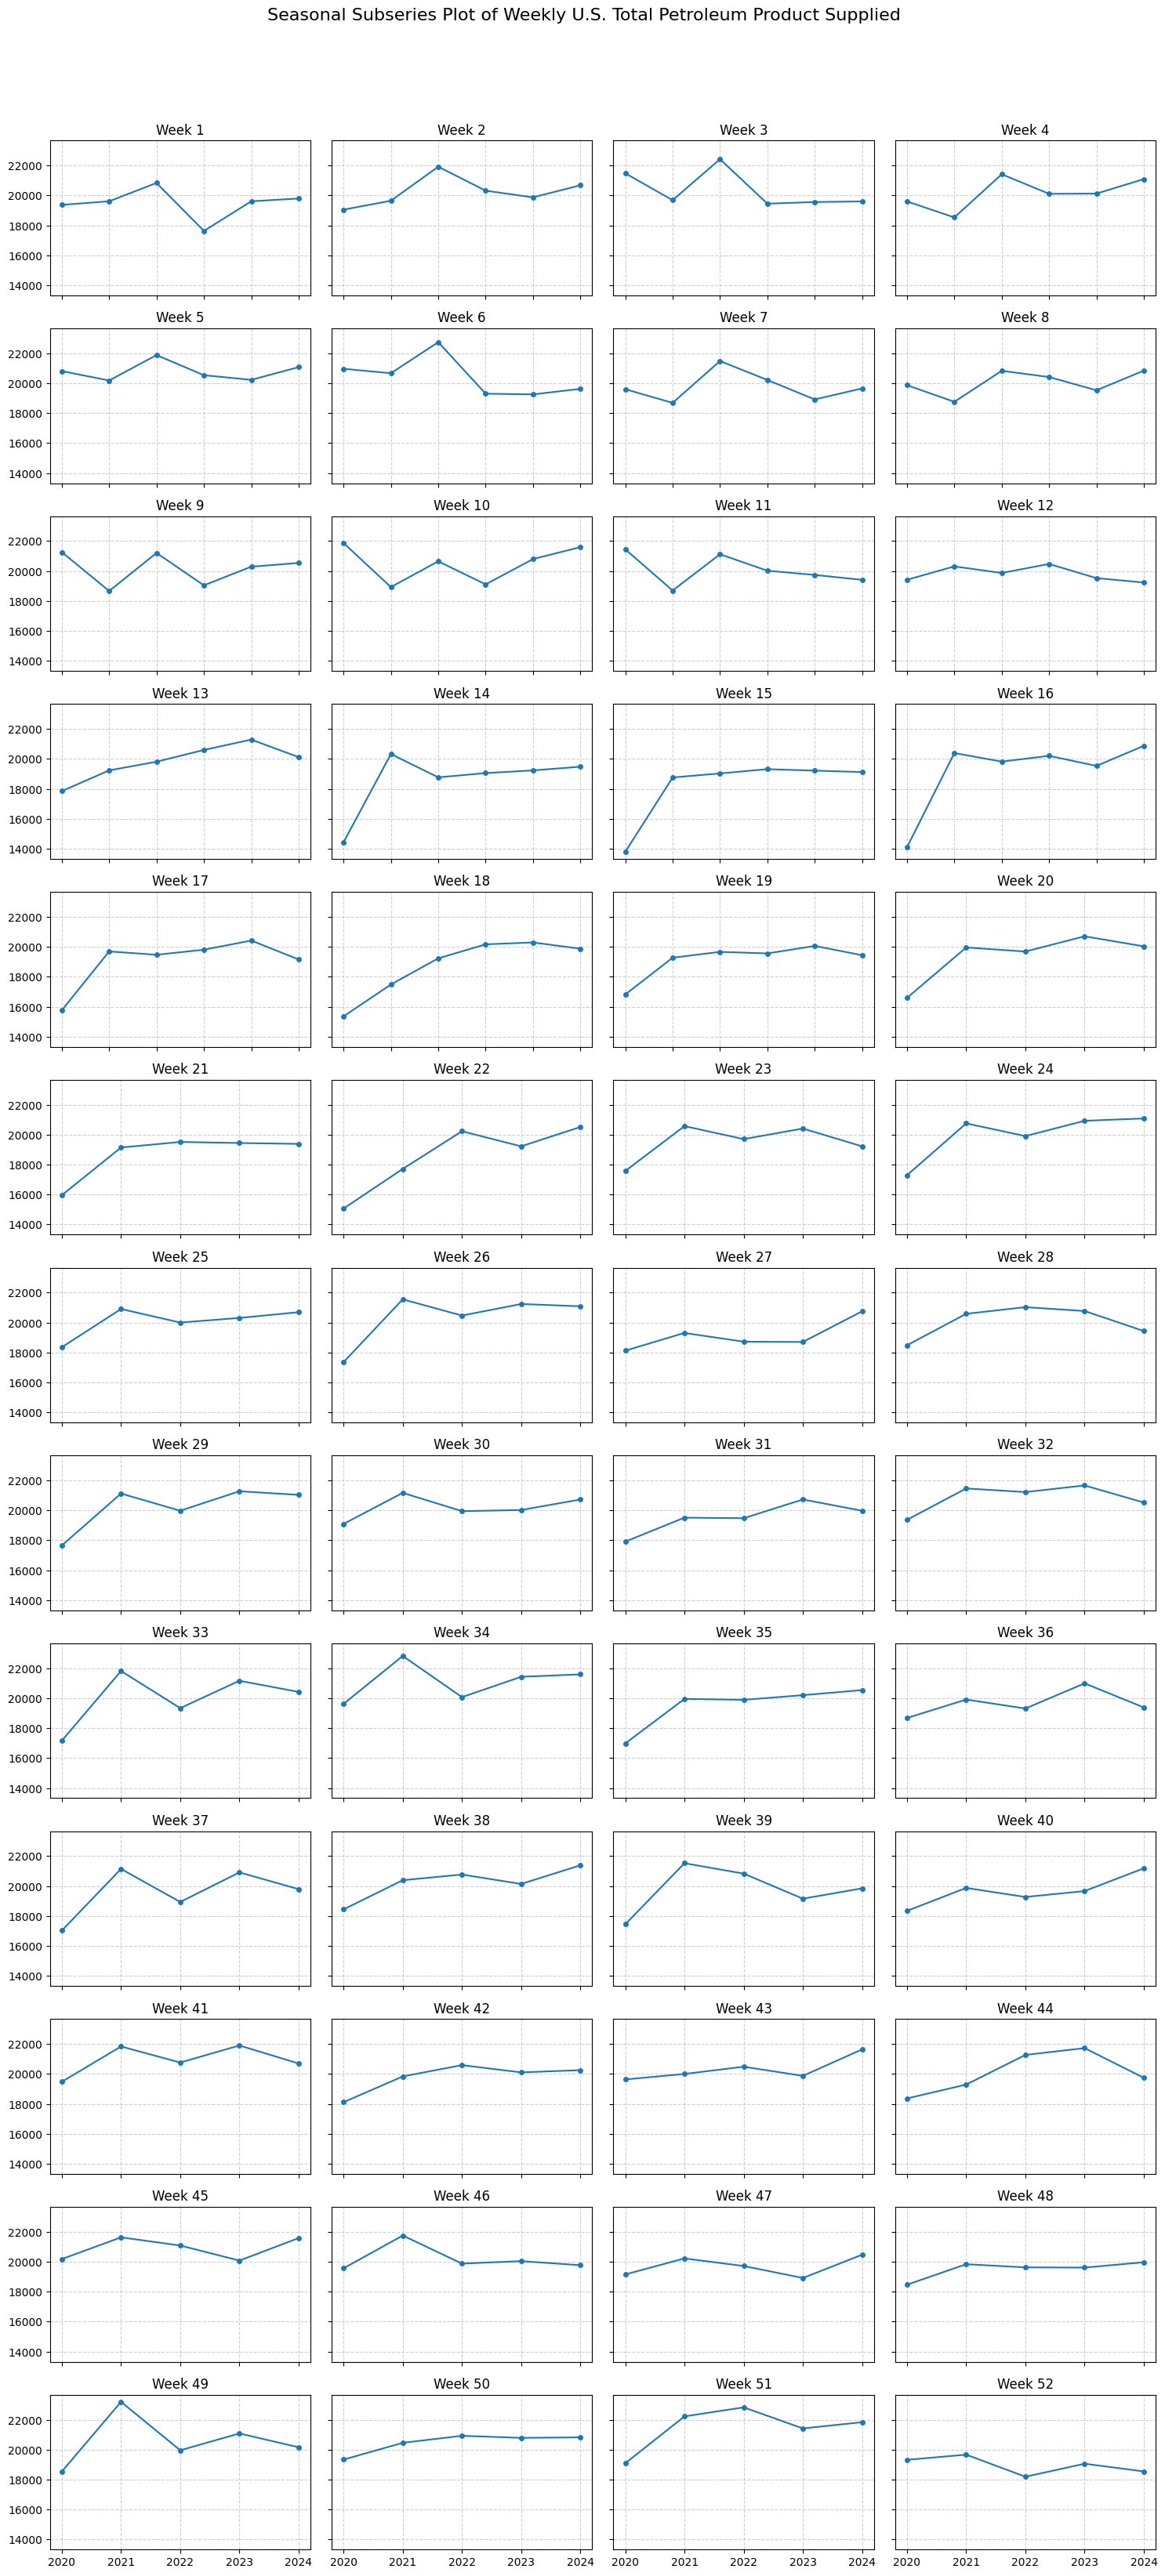

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Needed for array manipulation

# Assume df_analysis_filtered is available and includes 'Week_of_Year' and 'Year' columns

# --- Create Seasonal Subseries Plot ---
print("\nCreating Seasonal Subseries Plot for Total Product Supplied:")

# Ensure data is sorted by Week
df_analysis_filtered = df_analysis_filtered.sort_values(by='Week')

# Number of weeks in a year (excluding the occasional 53rd week for simplicity in plotting grid)
seasonal_period = 52
# Number of years in the data
num_years = df_analysis_filtered['Year'].nunique()

# Determine grid dimensions
n_cols = 4 # Number of columns in the grid
n_rows = int(np.ceil(seasonal_period / n_cols)) # Number of rows in the grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2.5), sharey=True)
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Iterate through each week of the year
for week_num in range(1, seasonal_period + 1):
    ax = axes[week_num - 1]

    # Filter data for the current week number
    weekly_data = df_analysis_filtered[df_analysis_filtered['Week_of_Year'] == week_num]

    # Plot the data for this week across years
    # Use the index within the subsetted data as the x-axis to simply show the points for each year
    ax.plot(weekly_data['Year'], weekly_data['Total US Product Supplied (Thousand Barrels)'], marker='o', linestyle='-', markersize=4)

    # Set title for the subplot
    ax.set_title(f'Week {week_num}')

    # Add a horizontal line at the mean for that specific week across years
    # ax.axhline(weekly_data['Total US Product Supplied (Thousand Barrels)'].mean(), color='red', linestyle='--', linewidth=0.8)

    # Remove x-axis tick labels from all but the bottom row for cleanliness
    if (week_num - 1) // n_cols < n_rows - 1:
         ax.set_xticklabels([])

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.6)


# Hide any unused subplots
for i in range(seasonal_period, len(axes)):
    fig.delaxes(axes[i])

# Set a main title and adjust layout
fig.suptitle('Seasonal Subseries Plot of Weekly U.S. Total Petroleum Product Supplied', fontsize=16, y=1.01)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make room for main title

# You might need to set a common Y label if sharey=False
# fig.text(0.0, 0.5, 'Product Supplied (Thousand Barrels)', va='center', rotation='vertical', fontsize=12)


# Save the plot (optional, update filename if saving)
# plt.savefig('plots/seasonal_subseries_plot.png')

plt.show()


Plotting Time Series Decomposition (re-running to create decomposition object):


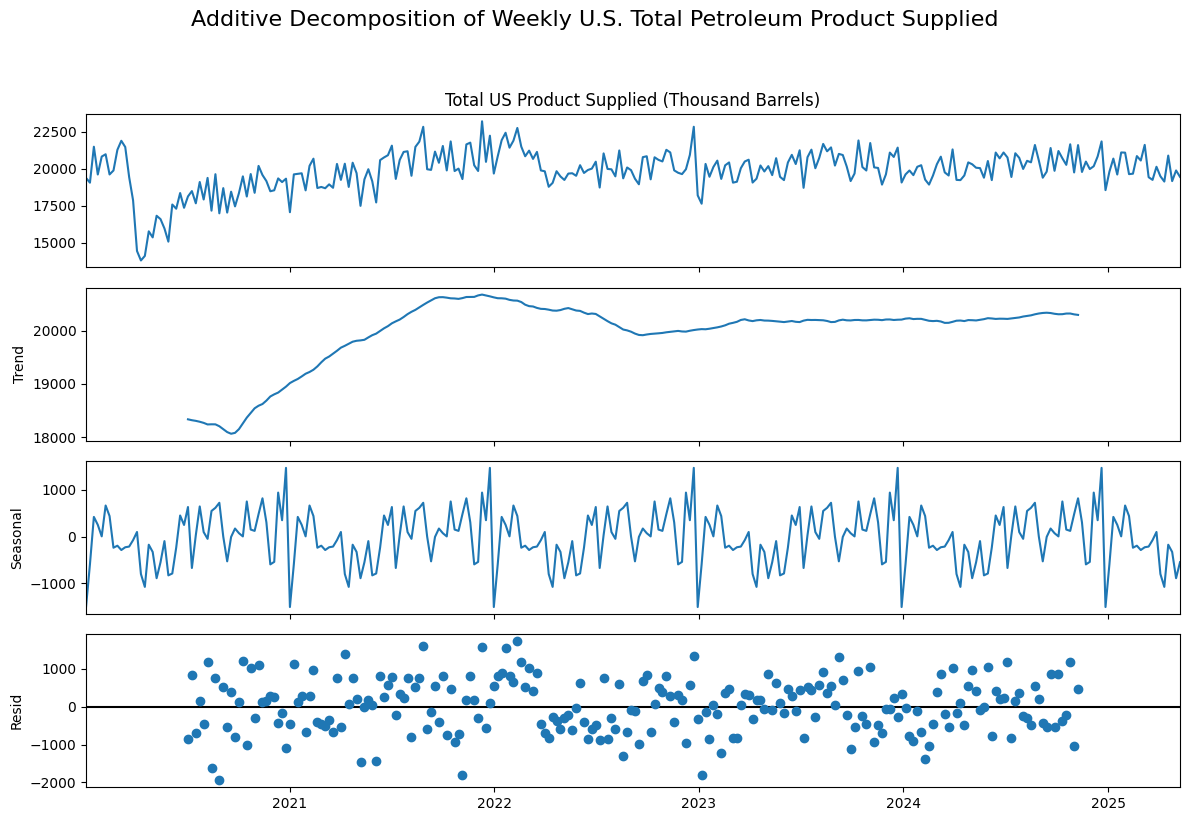

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assume df_analysis_filtered is available (which you have in this session)

# --- Prepare the data for decomposition ---
# Set the 'Week' column as the index to create a time series Series
# Select the value column 'Total US Product Supplied (Thousand Barrels)'
ts_data = df_analysis_filtered.set_index('Week')['Total US Product Supplied (Thousand Barrels)']

# Ensure the index is sorted (important for time series analysis)
ts_data = ts_data.sort_index()

# --- Perform Time Series Decomposition ---
# Use seasonal_decompose with an additive model and a period of 52 (for weekly seasonality)
decomposition = sm.tsa.seasonal_decompose(ts_data, model='additive', period=52)

# --- Plot the decomposed components (Optional to plot again, but running this cell is necessary to create 'decomposition') ---
print("\nPlotting Time Series Decomposition (re-running to create decomposition object):")

fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Additive Decomposition of Weekly U.S. Total Petroleum Product Supplied', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig('plots/additive_decomposition.png') # Uncomment and run if you want to save again
plt.show()

# The decomposition object is now created and available in this session.

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assume decomposition object is available from the decomposition step
# The residuals are stored in decomposition.resid

# --- Perform Ljung-Box Test on Residuals ---
print("\nPerforming Ljung-Box Test on Residuals:")

# Drop NaN values from residuals before the test, just in case
residuals_cleaned = decomposition.resid.dropna()

# Perform the test up to a certain number of lags (e.g., 10 and 20)
# The test provides results for each lag up to the specified max lag
ljungbox_results_10_lags = acorr_ljungbox(residuals_cleaned, lags=10)
ljungbox_results_20_lags = acorr_ljungbox(residuals_cleaned, lags=20)


print("\nLjung-Box Test Results (up to lag 10):")
print(ljungbox_results_10_lags)

print("\nLjung-Box Test Results (up to lag 20):")
print(ljungbox_results_20_lags)

# The output is a DataFrame with columns: 'lb_stat' (test statistic) and 'pvalue'
# Each row corresponds to a lag up to the specified max lag.


Performing Ljung-Box Test on Residuals:

Ljung-Box Test Results (up to lag 10):
      lb_stat  lb_pvalue
1    0.261640   0.608995
2    5.832465   0.054137
3    6.698401   0.082158
4   15.304711   0.004109
5   15.710650   0.007721
6   15.721689   0.015328
7   15.770975   0.027293
8   15.902385   0.043799
9   20.047131   0.017624
10  25.371610   0.004684

Ljung-Box Test Results (up to lag 20):
      lb_stat  lb_pvalue
1    0.261640   0.608995
2    5.832465   0.054137
3    6.698401   0.082158
4   15.304711   0.004109
5   15.710650   0.007721
6   15.721689   0.015328
7   15.770975   0.027293
8   15.902385   0.043799
9   20.047131   0.017624
10  25.371610   0.004684
11  26.317525   0.005819
12  27.819310   0.005879
13  31.013183   0.003357
14  37.841100   0.000550
15  42.409678   0.000194
16  42.498830   0.000332
17  46.392398   0.000151
18  46.687359   0.000235
19  49.520004   0.000154
20  49.523850   0.000259



Checking for NaNs in residuals before plotting PACF: 52 NaNs found.

Plotting Partial Autocorrelation Function (PACF) of Residuals:


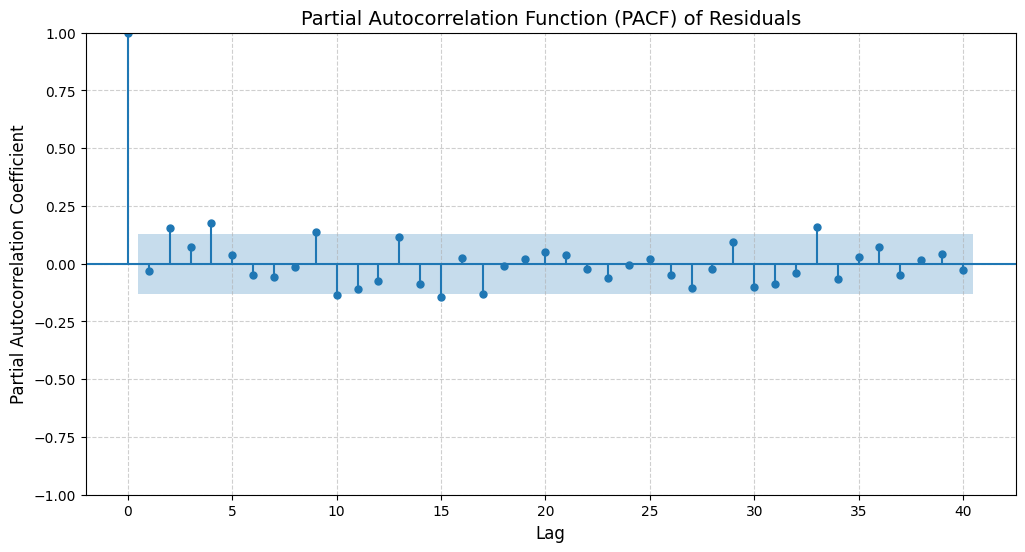

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm # We already imported this for decomposition
from statsmodels.graphics.tsaplots import plot_pacf # Import the PACF plot function

# Assume decomposition object is available from the decomposition step
# The residuals are stored in decomposition.resid

# --- Check for missing values in residuals (same as for ACF) ---
print("\nChecking for NaNs in residuals before plotting PACF:", decomposition.resid.isnull().sum(), "NaNs found.")

# --- Plot the Partial Autocorrelation Function (PACF) of the residuals ---
print("\nPlotting Partial Autocorrelation Function (PACF) of Residuals:")

plt.figure(figsize=(12, 6)) # Adjust figure size
# Plot the PACF, often beneficial to ignore the lag 0 correlation (always 1)
# Use method='ywm' or 'ols' for estimation if needed, default is usually fine for diagnostics
plot_pacf(decomposition.resid.dropna(), lags=40, ax=plt.gca()) # Plot up to 40 lags, drop NaNs

# Add titles and labels
plt.title('Partial Autocorrelation Function (PACF) of Residuals', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Partial Autocorrelation Coefficient', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()